# Amazon UK Grocery Dataset - Artificial Neural Network (ANN) Project

## Project Introduction: Artificial Neural Network (ANN):

This project, along with its counterparts in Data Visualization and Machine Learning (ML) on the same dataset, forms part of a portfolio hosted on GitHub, intended to showcase proficiency and expertise in various data science domains. Each project stands alone, allowing audience to assess skills independently, while also providing links to related projects for a holistic view of capabilities.

*Data Visualization Project:* https://github.com/sumit-biswas-uk/Amazon-UK-Grocery-Dataset---Data-Visualization-Project

*Machine Learning Project:* https://github.com/sumit-biswas-uk/Amazon-UK-Grocery-Dataset-Machine-Learning-ML-Project

In this phase of our project, we're diving into the Artificial Neural Network (ANN) for the Amazon UK Grocery dataset. In this project, we'll be using a neural network to predict revenue trends based on various features. Our goal is to construct a robust predictive model capable of forecasting revenue trends with precision.

**Important:** Please note that I have taken revenue as target variable here, but the model can be easily adapted to predict sales as well. For this, we just need to assign "y" as sales instead of revenue (in Data Preprocessing stage).

**Motivation**

Driven by the importance of staying ahead in a fiercely competitive market, businesses are increasingly turning to advanced analytical techniques. ANNs, with their ability to recognize complex patterns and relationships within data, emerge as an effective tool in this respect. By delving into our comprehensive dataset of Amazon UK Grocery, we aim to empower stakeholders to make informed decisions and formulate effective strategies according to predicted revenue.

**Approach**

To tackle this task, we'll be using an Artificial Neural Network (ANN) – a type of machine learning model inspired by the human brain's neural networks. Our approach involves several key steps:

* **Exploratory Data Analysis (EDA) and Data Visualization:** We'll start by exploring the dataset. We'll delve into its structure, and derive insights into the relationships between various variables. This includes understanding how features relate to one another, as well as their correlation with the target variables—revenue and sales. Moreover, we'll analyse the distribution of data within both features and target variables. This preliminary investigation serves a dual purpose: identifying crucial features that influence revenue generation (and can be used for our ANN) and guiding our strategies for data imputation and scaling.

* **Data Cleaning and Preprocessing:** We'll start by cleaning and preparing the dataset for our ANN. This includes selecting only relevant columns for our ANN, converting Date Parsed column to numerical format, handling missing data, splitting the data into training and testing sets and scaling the data.

* **Model Training:** Next, we'll train our ANN model using historical data from the Amazon UK Grocery dataset. This involves feeding the model with input features like product prices, image count, ratings, and review counts, and training it to predict revenue. Instead of traditional random data splits, we adopt a temporal partitioning approach. We arrange the dataset by date, using data from January 2006 till November 2020 for training (all rows except last 1000) and data from November 2020 till November 2021 for testing (last 1000 rows). This approach mimics real-life scenarios, where historical data is used to predict future outcomes. By training our models on historical data and testing them on "future" data, we aim to evaluate their predictive capabilities accurately.

* **Hyperparameter Tuning:** We'll fine-tune the model's parameters to optimize its performance. This includes adjusting settings like the number of hidden layers, dropout layers and their rates, regularization, learning rates, number of epochs etc, to improve accuracy and prevent overfitting or underfitting.

* **Evaluation:** Finally, we'll evaluate the trained model's performance using metrics like R Squared score and Mean Absolute Error (MAE) to assess its predictive capabilities.

**Outcome:**

By the end of this project, I aim to develop a reliable ANN model that can accurately predict revenue trends in the Amazon UK Grocery marketplace. This model will provide valuable insights for stakeholders, enabling them to make data-driven decisions and formulate effective strategies to optimize revenue generation.

**Download Dataset here:** https://www.kaggle.com/datasets/dalmacyali1905/amazon-uk-grocery-dataset-unsupervised-learning

## About the Dataset:

**Overview:**

This dataset provides a comprehensive overview of various Amazon grocery products. It captures vital statistics such as sales figures, revenue, ratings, and other essential metrics. This data was collected using the Helium10 tool.

**Key Features:**

Product Details: A description of the grocery product.

ASIN: Amazon Standard Identification Number.

Brand: Brand of the product.

Price: Price of the product.

Sales: Number of units sold.

Revenue: Total revenue generated from the product.

BSR: Best Seller Rank on Amazon.

FBA Fees: Fulfilment By Amazon fees.

Active Sellers #: Number of active sellers for the product.

Ratings: Average customer rating.

Review Count: Number of customer reviews.

Images: Number of product images available.

Review velocity: The number of reviews added in a specified time frame.

Buy Box: The seller who currently has the "Buy Box" for the product.

Category: The category of the product on Amazon (e.g., Food Cupboard, Drinks).

Size Tier: Size classification for the product.

Delivery: Delivery method.

Dimensions: Product dimensions (Length x Width x Height).

Weight: Weight of the product.

Creation Date: The date when the product was added to Amazon.

**Usage:**

This dataset can be used for various purposes, including:

Market analysis for grocery products on Amazon.

Brand comparison based on sales, reviews, and ratings.

Predictive modelling for sales or revenue.

Analysing the relationship between price, sales, and reviews.

Understanding the importance of product images in sales.

**Acknowledgments:**

Data was collected using the Helium10 tool.

## Importing Libraries

Here, we import necessary libraries such as NumPy, Pandas, Seaborn, Matplotlib, and Scikit-Learn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from matplotlib.ticker import EngFormatter

## Mounting Google drive and then loading the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/All Data/dataset.csv'

amazon_dataset_raw = pd.read_csv(file_path, delimiter=',')

amazon_dataset_raw.head(5)

Mounted at /content/drive


,Product Details,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,Review Count,Images,Review velocity,Buy Box,Category,Size Tier,Delivery,Dimensions,Weight,Creation Date
0,Lindt Lindor Milk Chocolate Truffles Box - The...,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,44069.0,12.0,868.0,Amazon,Food Cupboard,Small Oversize,AMZ,4.2x6.3x3.1,0.51,9/26/2014
1,Andrex Toilet Roll - Gentle Clean Toilet Paper...,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,40397.0,5.0,830.0,Amazon,Grocery,Large Oversize,AMZ,13.5x21.8x13.0,9.77,2/17/2011
2,Baileys Original Irish Cream Liqueur 1L,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,3827.0,6.0,235.0,Amazon,"Beer, Wine & Spirits",Large Oversize,AMZ,3.7x12.2x3.7,3.73,10/21/2010
3,Tassimo Kenco Americano Grande Coffee Pods (Pa...,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,28800.0,5.0,466.0,Amazon,Fresh & Chilled,Large Oversize,AMZ,6.8x15.5x6.2,3.26,8/4/2010
4,Tassimo Costa Gingerbread Latte Coffee Pods (P...,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,27494.0,9.0,223.0,Bountyville,Drinks,Large Oversize,FBA,6.7x15.4x6.1,4.74,9/3/2018


## Exploratory Data Analysis (EDA)
Checking Dataset Information.

In [ ]:
amazon_dataset_raw.shape

(6341, 20)

We have 6341 rows and 20 columns.

In [ ]:
amazon_dataset_raw.columns

Index(['Product Details', 'ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR',
       'FBA Fees', 'Active Sellers #', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Buy Box', 'Category', 'Size Tier', 'Delivery',
       'Dimensions', 'Weight', 'Creation Date'],
      dtype='object')

Above are our features and target variables (Revenue and Sales).

We will now proceed to understand the data types of each column and see if we need to change any datatype for our purpose of our ANN.

In [ ]:
amazon_dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Details   6341 non-null   object 
 1   ASIN              6341 non-null   object 
 2   Brand             6324 non-null   object 
 3   Price             5077 non-null   float64
 4   Sales             4539 non-null   float64
 5   Revenue           4830 non-null   float64
 6   BSR               5888 non-null   float64
 7   FBA Fees          3705 non-null   float64
 8   Active Sellers #  6290 non-null   float64
 9   Ratings           5513 non-null   float64
 10  Review Count      5513 non-null   float64
 11  Images            5849 non-null   float64
 12  Review velocity   6291 non-null   float64
 13  Buy Box           4409 non-null   object 
 14  Category          6341 non-null   object 
 15  Size Tier         4812 non-null   object 
 16  Delivery          5252 non-null   object 


From above we see that all the data types are almost correct, and we need to change only one. Columns like Price, Sales, Revenue, BSR, FBA Fee, Active Sellers, Ratings, Review Count, Images, Review Velocity and Weight are numerical, and the others are object and that's what we want. However, the Creation Date column is an object, and we want it to be a date time. We will tackle this later in the project.

Now we will proceed to find out if there are any empty cell and cells with NaN values.

In [ ]:
amazon_dataset_raw.isnull().sum()

Product Details        0
ASIN                   0
Brand                 17
Price               1264
Sales               1802
Revenue             1511
BSR                  453
FBA Fees            2636
Active Sellers #      51
Ratings              828
Review Count         828
Images               492
Review velocity       50
Buy Box             1932
Category               0
Size Tier           1529
Delivery            1089
Dimensions          1516
Weight              1437
Creation Date          1
dtype: int64

We see that the dataset has a lot of empty cells and cells with NaN values. To get a better picture we will create a function to give us the percentage of empty cells and cells with NaN values for each column.

In [ ]:
def percent_null(column):
  '''
  Iterate through relevant columns to get percentage
  of NaN values for each column or just pass one column
  as argument to get NaN value for that column.
  '''
  total_cells = np.prod(column.shape)
  missing_values = column.isnull().sum()

  percent_null = (missing_values / total_cells) *100

  return percent_null


In [ ]:
# Iterating through all the columns to get the percentage for each
# column by applying the function above (percent_null).
for column in amazon_dataset_raw.columns:
  percent_null_value = percent_null(amazon_dataset_raw[column])
  print(f"{column}:{percent_null_value:.2f}%")


Product Details:0.00%
ASIN:0.00%
Brand:0.27%
Price:19.93%
Sales:28.42%
Revenue:23.83%
BSR:7.14%
FBA Fees:41.57%
Active Sellers #:0.80%
Ratings:13.06%
Review Count:13.06%
Images:7.76%
Review velocity:0.79%
Buy Box:30.47%
Category:0.00%
Size Tier:24.11%
Delivery:17.17%
Dimensions:23.91%
Weight:22.66%
Creation Date:0.02%


We see that a big part of our dataset has missing values. Specifically, the columns we will use for the purpose of this project. For example: Sales and Revenue has close to or over 25% of data missing. FBA fees has over 41% of data missing and Weight has over 23% of data missing. Although there is missing data in almost every column, these are few examples of columns which we will potentially use in our project.

Later we will discuss how we tackle this missing data. We might end up dropping some columns (like FBA Fee: as it might have a high correlation with price) for our ANN project or impute the missing data with mean, median or mode (depending on the distribution and type of data)

Now we will try and understand how many unique brands are present in our Brands column. This is done to get an idea if there are high number of spelling mistakes when entering data into this column. This will later help us understand if we will be able to use this column in our ANN model with One-Hot Encoding.

In [ ]:
unique_brands = amazon_dataset_raw['Brand'].unique()
unique_brands

array(['Lindt', 'Andrex', 'BAILEYS', ..., 'García DE LA cruz 1872',
       'Kent Crisps Limited', 'Sonneveld'], dtype=object)

In [ ]:
len(unique_brands) # Checking the length of unique brands.

1566

In [ ]:
amazon_dataset_raw['Brand'].nunique() # Checking the number of unique brands.

1565

Finding out if there are any missing or NaN entries in this column.

In [ ]:
amazon_dataset_raw['Brand'].isnull().sum() # Checking for number of NaN or empty cells in Brand column.

17

We see a very high number of unique entries in the Brand column which might be an indication of lot of spelling mistakes and errors while entering the brands. We also find that there are 17 missing or NaN entries in this column.

Next, we will try and understand the BSR column. We will see the minimum and the maximum ratings.

In [ ]:
amazon_dataset_raw['BSR'].min()

0.0

In [ ]:
amazon_dataset_raw['BSR'].max()

4405945.0

We see that the max rating is 4405945 which is a very high number. To make sure we actually have this high rating number, we will cross check by arranging the BSR column in descending order.

In [ ]:
bsr_decending = amazon_dataset_raw['BSR'].sort_values(ascending=False)
bsr_decending

5532    4405945.0
5531    4294882.0
5528    4071419.0
5526    3717946.0
5524    3278284.0
          ...    
6173          NaN
6199          NaN
6211          NaN
6229          NaN
6246          NaN
Name: BSR, Length: 6341, dtype: float64

We see that indeed the max rating is a very high number.

Before going ahead, we will create a new "Date Parsed" column to get our Creation Date column into datetime format (as discussed above).

In [ ]:
# Creating a new column with dates parsed.
amazon_dataset_raw['Date Parsed'] = pd.to_datetime(amazon_dataset_raw['Creation Date'], format='%m/%d/%Y')
amazon_dataset_raw.head()

,Product Details,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,...,Images,Review velocity,Buy Box,Category,Size Tier,Delivery,Dimensions,Weight,Creation Date,Date Parsed
0,Lindt Lindor Milk Chocolate Truffles Box - The...,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,...,12.0,868.0,Amazon,Food Cupboard,Small Oversize,AMZ,4.2x6.3x3.1,0.51,9/26/2014,2014-09-26
1,Andrex Toilet Roll - Gentle Clean Toilet Paper...,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,...,5.0,830.0,Amazon,Grocery,Large Oversize,AMZ,13.5x21.8x13.0,9.77,2/17/2011,2011-02-17
2,Baileys Original Irish Cream Liqueur 1L,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,...,6.0,235.0,Amazon,"Beer, Wine & Spirits",Large Oversize,AMZ,3.7x12.2x3.7,3.73,10/21/2010,2010-10-21
3,Tassimo Kenco Americano Grande Coffee Pods (Pa...,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,...,5.0,466.0,Amazon,Fresh & Chilled,Large Oversize,AMZ,6.8x15.5x6.2,3.26,8/4/2010,2010-08-04
4,Tassimo Costa Gingerbread Latte Coffee Pods (P...,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,...,9.0,223.0,Bountyville,Drinks,Large Oversize,FBA,6.7x15.4x6.1,4.74,9/3/2018,2018-09-03


## Data Visualization

### Relationships


In this section, we'll create scatterplots to explore the relationships between several features (many of which we'll utilize in our ANN model), and our target variables (sales and revenue). Additionally, we'll generate a heatmap to gain insight into the correlation between these features as well as their correlations with our target variables.

Our hypothesis is that features such as Images, Ratings, Review Count, and Review Velocity may exhibit some degree of correlation with sales and revenue.

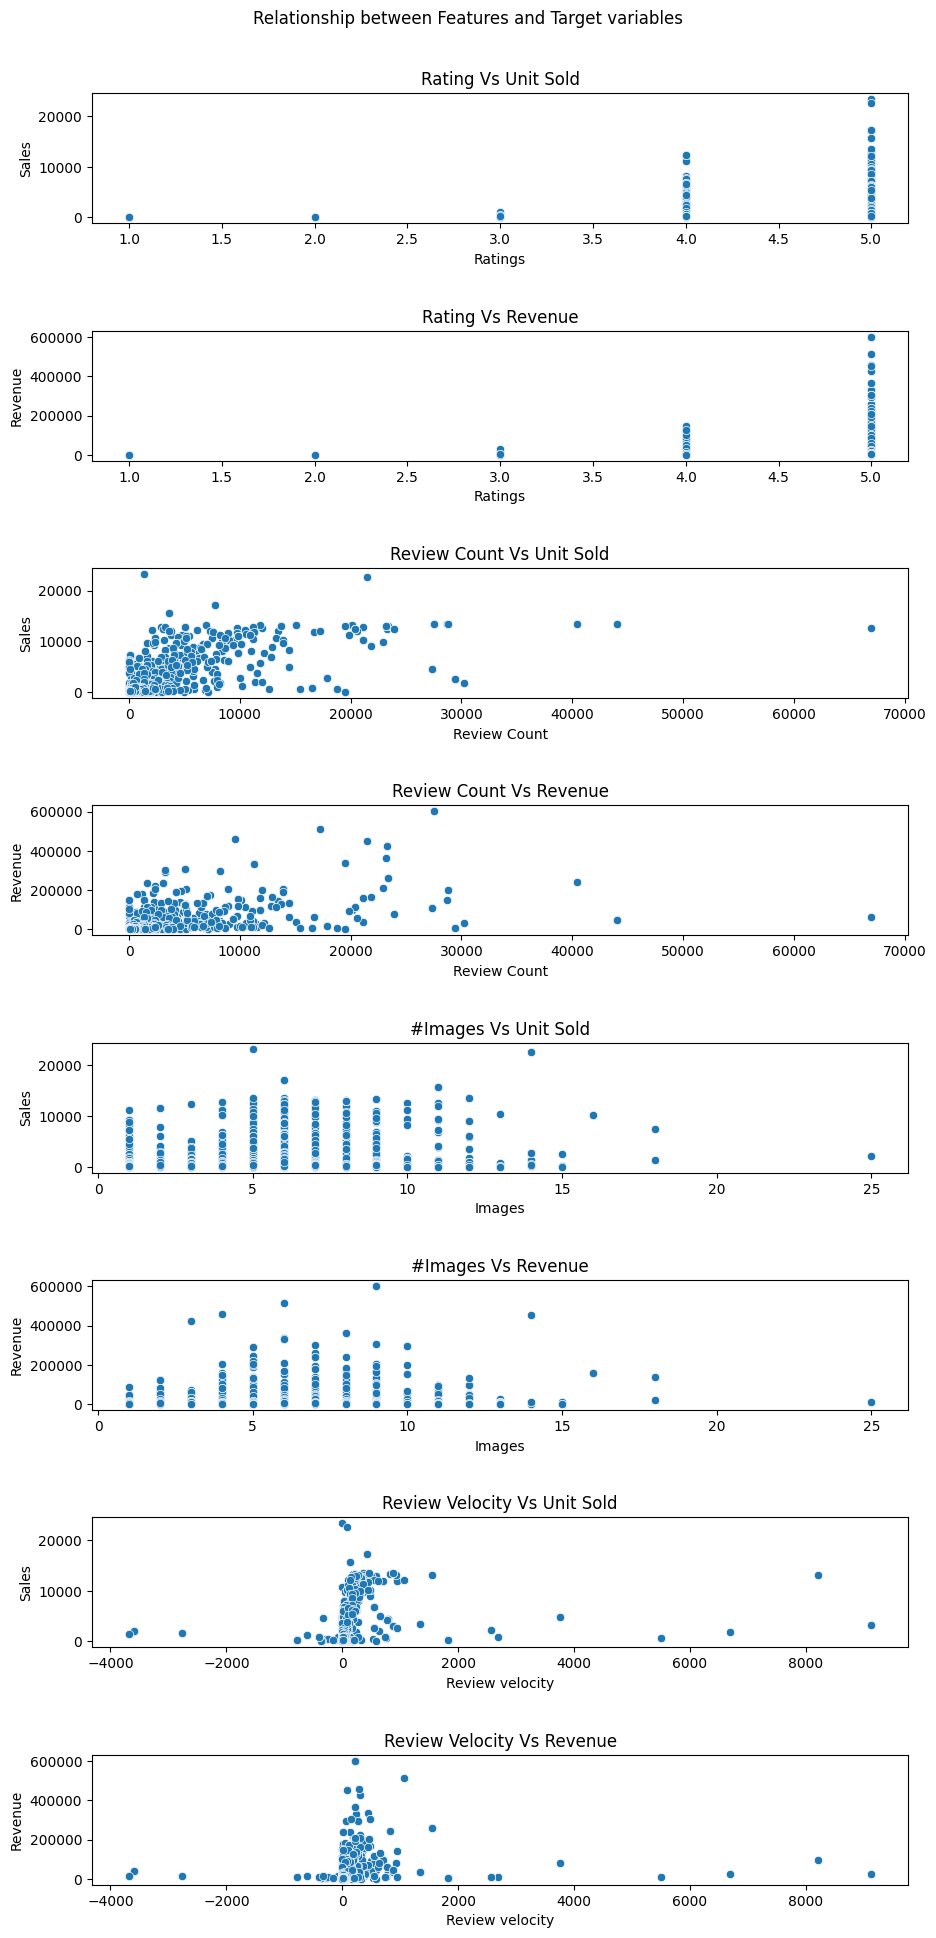

In [ ]:
fig, ax = plt.subplots(8, 1, figsize=(10, 20))
fig.suptitle('Relationship between Features and Target variables') # Setting figure title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Ratings'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[0])
ax[0].set_title('Rating Vs Unit Sold') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Ratings'], y=amazon_dataset_raw['Revenue'], data=amazon_dataset_raw, ax=ax[1])
ax[1].set_title('Rating Vs Revenue') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Review Count'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[2])
ax[2].set_title('Review Count Vs Unit Sold') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Review Count'], y=amazon_dataset_raw['Revenue'], data=amazon_dataset_raw, ax=ax[3])
ax[3].set_title('Review Count Vs Revenue') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Images'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[4])
ax[4].set_title('#Images Vs Unit Sold') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Images'], y=amazon_dataset_raw['Revenue'], data=amazon_dataset_raw, ax=ax[5])
ax[5].set_title('#Images Vs Revenue') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Review velocity'], y=amazon_dataset_raw['Sales'], data=amazon_dataset_raw, ax=ax[6])
ax[6].set_title('Review Velocity Vs Unit Sold') # Setting plot title.

# Plotting our data on scatterplot.
sns.scatterplot(x=amazon_dataset_raw['Review velocity'], y=amazon_dataset_raw['Revenue'], data=amazon_dataset_raw, ax=ax[7])
ax[7].set_title('Review Velocity Vs Revenue') # Setting plot title.

plt.tight_layout(pad=3) # Adjusting the padding around the plots for better visibility.
plt.show()

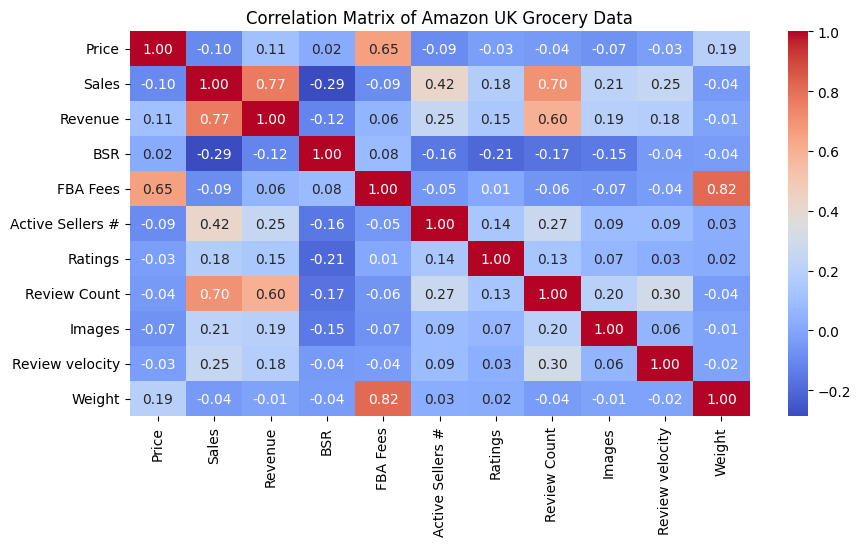

In [ ]:
numeric_df = amazon_dataset_raw.select_dtypes(include=[np.number])  # Select only numeric columns.
corr = numeric_df.corr()  # Calculating correlation.

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm") # Creating a heatmap.
plt.title('Correlation Matrix of Amazon UK Grocery Data') # Setting plot title.
plt.show()

Upon plotting the relationships between the features and target variables, as well as generating the heatmap, we observe the following:

* Review count exhibits a high correlation with our target variables, which is promising.

* Images and the target variables do not demonstrate a very high correlation.

* Rating and the target variables also do not exhibit a very high correlation.

* Review Velocity and the target variables likewise do not show very high correlation.

* Additionally, we notice that none of our features have a linear relationship with our target variables.

We also observe that certain features have obvious high correlations with each other, which may lead to overfitting when training our ANN model:

* FBA fee and price are highly correlated.

* FBA fee and weight are highly correlated.

We will proceed to clean the data and reevaluate these correlations with cleaned data. Subsequently, we will devise strategies to address the issue of high correlations among features in our ANN model.

### Distributions



Now we will look at the distribution of our features and target variables. This will give us further insights into the data and also help us understand what strategy to use when it comes to imputing missing data as well as scaling the data.

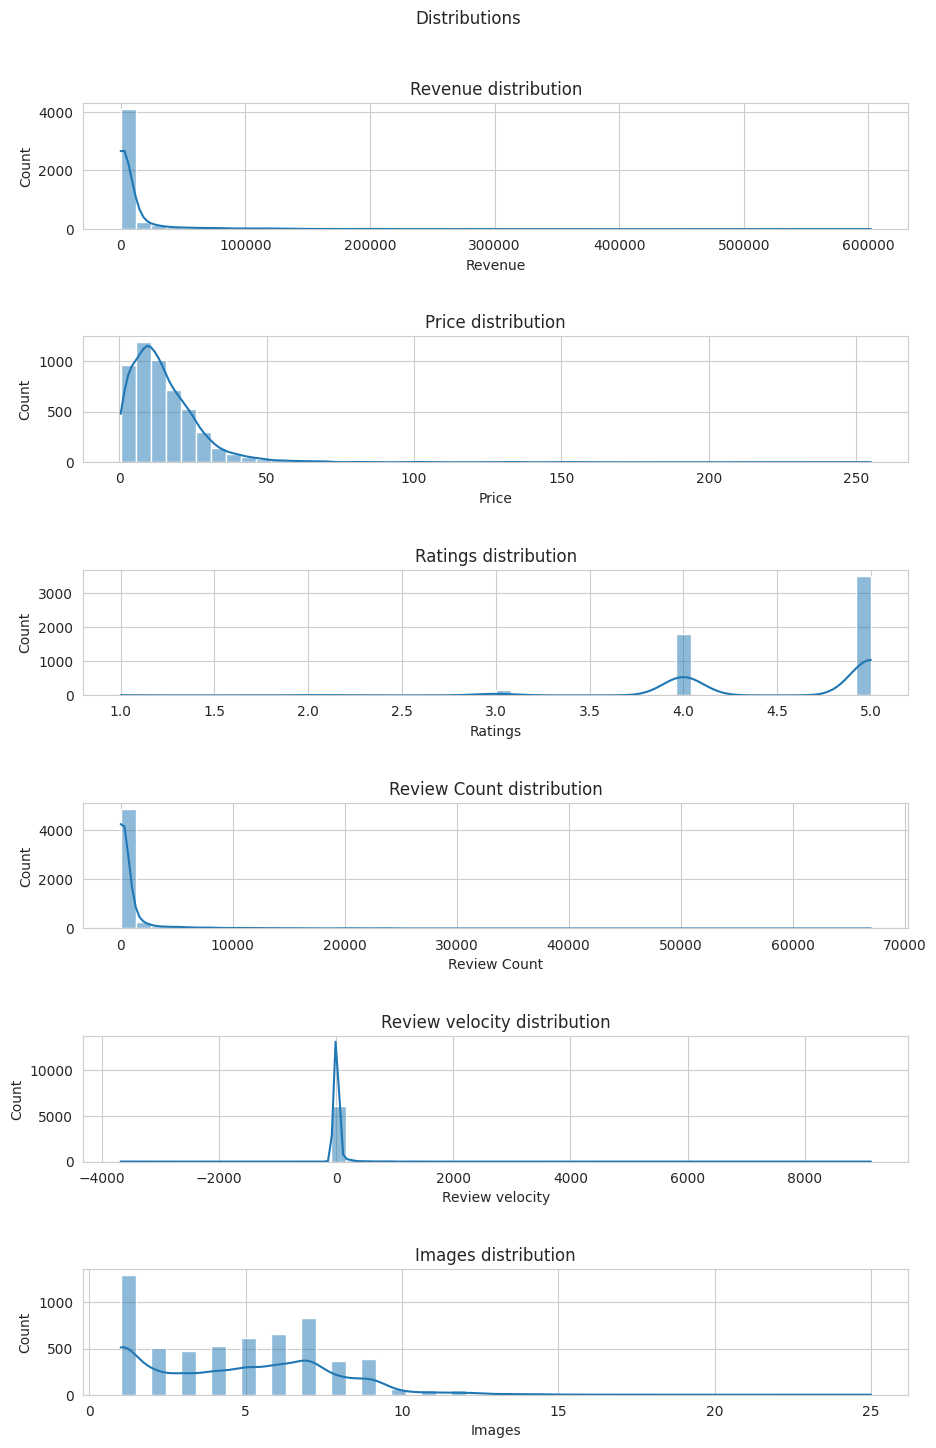

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(6, 1, figsize=(10, 15))
fig.suptitle('Distributions') # Setting figure title.

# We will iterate through the relevant columns to plot their distributions on separate graphs.
for index, column in enumerate(amazon_dataset_raw[['Revenue', 'Price', 'Ratings', 'Review Count', 'Review velocity', 'Images']]):
  # Plotting our column in iteration on a histplot along with kde plot.
  sns.histplot(x=amazon_dataset_raw[column], ax=ax[index], kde=True, bins=50)
  ax[index].set_title(f"{column} distribution") # Setting plot title.

plt.tight_layout(pad=3) # Adjusting the padding around the plots for better visibility.
plt.show()


From the distribution graphs above, we can derive the following conclusions:

* Revenue for the majority of observations falls around £10,000.

* The price of most products is around £10.

* Ratings for most observations are between 4 and 5.

* Review count for most observations is under 1000.

* The review velocities of most observations are around -50 to 100.

* The number of images for most observations ranges from 1 to 2.

Most importantly, we observe that none of the distribution graphs exhibit a bell curve shape; instead, they are skewed. Therefore, when replacing missing data for numerical columns, we will use the median (rather than the mean) and while scaling the data, we will use RobustScaler (rather than StandardScaler or MinMaxScaler), to make our model less sensitive to outliers.

## Data Cleaning

Now we will proceed with data cleaning. First, we will look at the columns  again and decide which columns to keep and which ones to drop.

In [ ]:
amazon_dataset_raw.columns

Index(['Product Details', 'ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR',
       'FBA Fees', 'Active Sellers #', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Buy Box', 'Category', 'Size Tier', 'Delivery',
       'Dimensions', 'Weight', 'Creation Date', 'Date Parsed'],
      dtype='object')

We see that for our ANN model, we do not need Product Details, Buy Box, Size Tier, Delivery, Dimensions, and Creation Date (as we have Date Parsed column). So, we will only select the columns except the ones above.

In [ ]:
amazon_dataset_clean = amazon_dataset_raw[['ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR',
       'FBA Fees', 'Active Sellers #', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Category', 'Weight',
       'Date Parsed']]

amazon_dataset_clean

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers #,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
0,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,44069.0,12.0,868.0,Food Cupboard,0.51,2014-09-26
1,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,40397.0,5.0,830.0,Grocery,9.77,2011-02-17
2,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,3827.0,6.0,235.0,"Beer, Wine & Spirits",3.73,2010-10-21
3,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,28800.0,5.0,466.0,Fresh & Chilled,3.26,2010-08-04
4,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,27494.0,9.0,223.0,Drinks,4.74,2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,B089H2CBKP,García DE LA cruz 1872,17.50,162.0,2835.0,6418.0,6.82,1.0,5.0,530.0,4.0,2.0,Food Cupboard,4.23,2020-07-16
6337,B075WX3V4F,Tree of Life,4.84,931.0,4506.0,7297.0,2.89,1.0,5.0,562.0,6.0,15.0,Food Cupboard,1.68,2017-09-24
6338,B011A1FZJI,Kent Crisps Limited,13.93,122.0,1699.0,6486.0,6.27,1.0,5.0,228.0,1.0,1.0,Food Cupboard,5.03,2015-07-01
6339,B0013GAEII,Biona,2.85,208.0,593.0,7443.0,2.73,7.0,4.0,260.0,7.0,0.0,Food Cupboard,1.81,2008-02-02


I will rename the Active Sellers column from Active Sellers  # to Active Sellers as it was bugging me :).

In [ ]:
amazon_dataset_clean.rename(columns={'Active Sellers #': 'Active Sellers'}, inplace=True)
amazon_dataset_clean

<ipython-input-22-31a869f00e12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean.rename(columns={'Active Sellers #': 'Active Sellers'}, inplace=True)


,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
0,B00NW479QO,Lindt,3.50,13466.0,47131.0,3.0,2.62,30.0,5.0,44069.0,12.0,868.0,Food Cupboard,0.51,2014-09-26
1,B004OCO20E,Andrex,18.28,13338.0,243819.0,2.0,8.38,30.0,5.0,40397.0,5.0,830.0,Grocery,9.77,2011-02-17
2,B0049NYI7K,BAILEYS,9.99,11194.0,111828.0,4.0,3.93,22.0,5.0,3827.0,6.0,235.0,"Beer, Wine & Spirits",3.73,2010-10-21
3,B016DEGFWI,Tassimo,14.87,13492.0,200626.0,2.0,5.19,11.0,5.0,28800.0,5.0,466.0,Fresh & Chilled,3.26,2010-08-04
4,B07JVF2FCV,Tassimo,45.00,13377.0,601965.0,6.0,11.03,1.0,5.0,27494.0,9.0,223.0,Drinks,4.74,2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6336,B089H2CBKP,García DE LA cruz 1872,17.50,162.0,2835.0,6418.0,6.82,1.0,5.0,530.0,4.0,2.0,Food Cupboard,4.23,2020-07-16
6337,B075WX3V4F,Tree of Life,4.84,931.0,4506.0,7297.0,2.89,1.0,5.0,562.0,6.0,15.0,Food Cupboard,1.68,2017-09-24
6338,B011A1FZJI,Kent Crisps Limited,13.93,122.0,1699.0,6486.0,6.27,1.0,5.0,228.0,1.0,1.0,Food Cupboard,5.03,2015-07-01
6339,B0013GAEII,Biona,2.85,208.0,593.0,7443.0,2.73,7.0,4.0,260.0,7.0,0.0,Food Cupboard,1.81,2008-02-02


We will again find out the number and percentage of NaN values and empty cells in our clean dataframe.

In [ ]:
amazon_dataset_clean.isnull().sum()

ASIN                  0
Brand                17
Price              1264
Sales              1802
Revenue            1511
BSR                 453
FBA Fees           2636
Active Sellers       51
Ratings             828
Review Count        828
Images              492
Review velocity      50
Category              0
Weight             1437
Date Parsed           1
dtype: int64

In [ ]:
# We will iterate through all columns and find out the
# percentage of NaN values or empty cells with the percent_null
# function created above.
for column in amazon_dataset_clean.columns:
  percent_null_value = percent_null(amazon_dataset_clean[column])
  print(f"{column}: {percent_null_value:.2f}%")

ASIN: 0.00%
Brand: 0.27%
Price: 19.93%
Sales: 28.42%
Revenue: 23.83%
BSR: 7.14%
FBA Fees: 41.57%
Active Sellers: 0.80%
Ratings: 13.06%
Review Count: 13.06%
Images: 7.76%
Review velocity: 0.79%
Category: 0.00%
Weight: 22.66%
Date Parsed: 0.02%


In [ ]:
amazon_dataset_clean.isna().sum()

ASIN                  0
Brand                17
Price              1264
Sales              1802
Revenue            1511
BSR                 453
FBA Fees           2636
Active Sellers       51
Ratings             828
Review Count        828
Images              492
Review velocity      50
Category              0
Weight             1437
Date Parsed           1
dtype: int64

We will also find out if there are any cells with just whitespaces.

In [ ]:
blanks = []

# Using itertuples(), it returns a tuple with the index as the first element,
# followed by the row values in following indexes.
# Iterate through each row using itertuples.
for row in amazon_dataset_clean.itertuples():
    # Iterate through each cell in the row.
    for cell in row[1:]:  # Skip the first element which is the index.
        if str(cell).isspace():  # Convert cell to string and check if it contains only whitespace.
            blanks.append(row.Index)  # Append index of the row with whitespace to the blanks list.

print(blanks)  # Printing the results to see all index position which has whitespaces.

[]


We see that there are no cells with whitespaces.

We will find out the data types of each column again.

In [ ]:
amazon_dataset_clean.dtypes

ASIN                       object
Brand                      object
Price                     float64
Sales                     float64
Revenue                   float64
BSR                       float64
FBA Fees                  float64
Active Sellers            float64
Ratings                   float64
Review Count              float64
Images                    float64
Review velocity           float64
Category                   object
Weight                    float64
Date Parsed        datetime64[ns]
dtype: object

We now see that we have correct data types for all columns including the Date Parsed as datetime.

In [ ]:
amazon_dataset_clean.columns

Index(['ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Category', 'Weight', 'Date Parsed'],
      dtype='object')

We also see that we have all relevant columns now in our clean dataframe.

### Handling Missing Data

As we saw earlier that the distribution of our numeric data is skewed, we will use median to fill the missing data for numerical column.

We will also use mode (most frequent) for our object columns.

We will use SimpleImputer to impute these columns.

In [ ]:
median_imputer = SimpleImputer(strategy='median') # Creating an instance in SimpleImputer for median.
mode_imputer = SimpleImputer(strategy='most_frequent') # Creating and instance in SimpleImputer for mode.

columns_impute_median = ['Price', 'Sales', 'Revenue', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Weight']
columns_impute_mode = ['Brand', 'Date Parsed']

# Fitting our numerical data into median_imputer.
amazon_dataset_clean[columns_impute_median] = median_imputer.fit_transform(amazon_dataset_clean[columns_impute_median])
# Fitting our non numeric data into our mode_imputer.
amazon_dataset_clean[columns_impute_mode] = mode_imputer.fit_transform(amazon_dataset_clean[columns_impute_mode])

amazon_dataset_clean.isna().sum()

<ipython-input-29-b8ccc79193ed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean[columns_impute_median] = median_imputer.fit_transform(amazon_dataset_clean[columns_impute_median])
<ipython-input-29-b8ccc79193ed>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_dataset_clean[columns_impute_mode] = mode_imputer.fit_transform(amazon_dataset_clean[columns_impute_mode])


ASIN               0
Brand              0
Price              0
Sales              0
Revenue            0
BSR                0
FBA Fees           0
Active Sellers     0
Ratings            0
Review Count       0
Images             0
Review velocity    0
Category           0
Weight             0
Date Parsed        0
dtype: int64

In [ ]:
amazon_dataset_clean.isnull().sum()

ASIN               0
Brand              0
Price              0
Sales              0
Revenue            0
BSR                0
FBA Fees           0
Active Sellers     0
Ratings            0
Review Count       0
Images             0
Review velocity    0
Category           0
Weight             0
Date Parsed        0
dtype: int64

After filling the missing data, we now see that we do not have any empty cells or cells with NaN values in our clean dataframe.

### String Matching

I have completed a string matching for Brand column in the Data Visualization and ML projects (links provided above). We have found that there are lot of different ways a brand have been entered during data entry phase. Therefore, cleaning them and using them in our ANN will not be necessary as the high number of brands that will be present after cleaning is sufficient to result in overfitting in our model. Therefore, we will not repeat this exercise in this section.

## Understanding Correlations: (after data cleaning)

Now that we have cleaned the data, we will reevaluate the correlations between the numeric features and their correlations with target variable. This analysis will help us understand which features to retain and which ones to drop. Our objectives are:

* Determine if there are high correlations among features. If so, we will devise a strategy to either combine them or drop redundant ones.

* Assess the correlation between the features and the target variables.

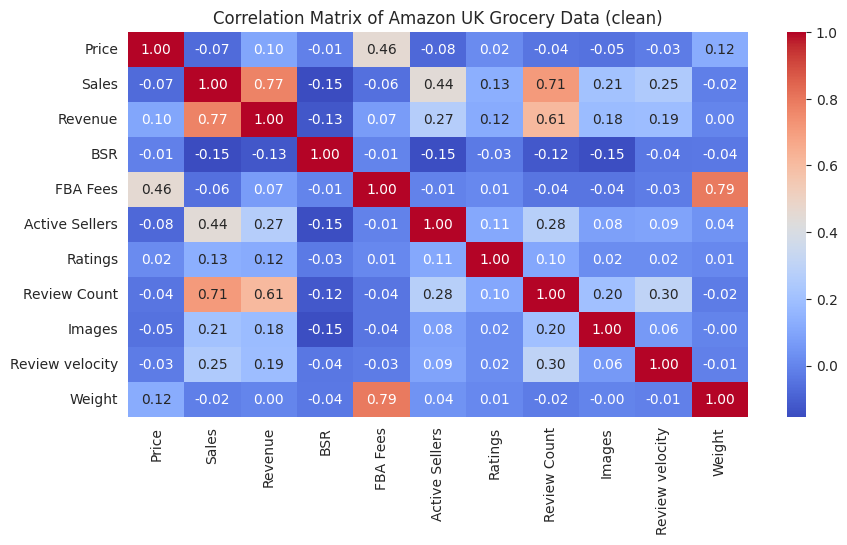

In [ ]:
numeric_df = amazon_dataset_clean.select_dtypes(include=[np.number])  # Select only numeric columns.
corr = numeric_df.corr()  # Calculating correlation.

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm") # Generating heatmap.
plt.title('Correlation Matrix of Amazon UK Grocery Data (clean)') # Setting plot title.
plt.show()


From the analysis above, we observe the following:

* Review count still exhibits a high correlation with our target variables, which is positive.

* The correlation between Images and the target variables has decreased after cleaning the data.

* Similarly, the correlation between Rating and the target variables has also decreased after data cleaning.

* The correlation between Review Velocity and the target variables has slightly decreased after data cleaning.

Additionally, we note that the following features still exhibit high correlation with each other, which may lead to overfitting when training our ANN model:

* FBA fee and Weight are highly correlated.

However, there is an improvement in the correlation between FBA fee and price, which is now at acceptable levels (under 50%).

## Data Preprocessing

Following the data cleaning phase, our next step involves data preprocessing to ready our dataset for ANN model. One crucial aspect is converting the 'Date Parsed' column into numerical format, aligning with the expectations of machine learning models.

To achieve this, we'll create three new columns: 'year', 'month', and 'date'. These columns will extract the respective components from the 'Date Parsed' column, allowing us to represent dates numerically. This transformation enables our ANN model to effectively process temporal information, an important aspect in forecasting revenue trends.

However, before we do that, we will arrange the data in ascending order by the Date Parsed column to achieve the train test split as discussed above.

In [ ]:
amazon_dataset_clean = amazon_dataset_clean.sort_values('Date Parsed') # Arranging the dataset in ascending order according to Date Parsed column.

In [ ]:
amazon_dataset_clean.head(30)

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed
45,B003AIF4Q4,HIGH5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01
108,B003AIF4Q4,HIGH5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01
14,B0007KQRS2,Brabantia,2.75,13216.0,36344.0,17.0,2.63,10.0,5.0,15027.0,7.0,185.0,Grocery,0.20,2006-01-01
3076,B07F7ZBSWG,PG Tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31
3161,B07F7ZBSWG,PG Tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31
3192,B004G3PQ7Y,Tetley,9.80,547.0,5361.0,3439.0,4.16,13.0,5.0,1177.0,5.0,0.0,Drinks,2.16,2006-08-31
76,B000IU3VS0,HG,4.00,7687.0,30748.0,77.0,3.09,15.0,4.0,12196.0,8.0,115.0,Grocery,2.91,2006-09-20
71,B000IU40HQ,HG,5.00,11994.0,59970.0,73.0,3.01,13.0,5.0,20547.0,6.0,618.0,Grocery,1.50,2006-09-21
4029,B000J69KGA,evian,14.00,301.0,4214.0,9534.0,8.97,26.0,5.0,119.0,4.0,3.0,Drinks,29.43,2006-10-02
4208,B000J69KGA,evian,14.00,301.0,4214.0,9534.0,8.97,26.0,5.0,119.0,4.0,3.0,Drinks,29.43,2006-10-02


In [ ]:
amazon_dataset_clean.columns

Index(['ASIN', 'Brand', 'Price', 'Sales', 'Revenue', 'BSR', 'FBA Fees',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Category', 'Weight', 'Date Parsed'],
      dtype='object')

In [ ]:
amazon_dataset_clean.shape

(6341, 15)

Creating three additional columns to convert Date Parsed into numerical values.

In [ ]:
# Creating 3 new columns to convert the Date Parsed column into numerical.
amazon_dataset_clean['year'] = amazon_dataset_clean['Date Parsed'].dt.year
amazon_dataset_clean['month'] = amazon_dataset_clean['Date Parsed'].dt.month
amazon_dataset_clean['day'] = amazon_dataset_clean['Date Parsed'].dt.day

In [ ]:
amazon_dataset_clean.head(30)

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed,year,month,day
45,B003AIF4Q4,HIGH5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01,2006,1,1
108,B003AIF4Q4,HIGH5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01,2006,1,1
14,B0007KQRS2,Brabantia,2.75,13216.0,36344.0,17.0,2.63,10.0,5.0,15027.0,7.0,185.0,Grocery,0.20,2006-01-01,2006,1,1
3076,B07F7ZBSWG,PG Tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31,2006,8,31
3161,B07F7ZBSWG,PG Tips,10.07,2133.0,21479.0,935.0,4.20,15.0,5.0,2806.0,8.0,38.0,Drinks,2.14,2006-08-31,2006,8,31
3192,B004G3PQ7Y,Tetley,9.80,547.0,5361.0,3439.0,4.16,13.0,5.0,1177.0,5.0,0.0,Drinks,2.16,2006-08-31,2006,8,31
76,B000IU3VS0,HG,4.00,7687.0,30748.0,77.0,3.09,15.0,4.0,12196.0,8.0,115.0,Grocery,2.91,2006-09-20,2006,9,20
71,B000IU40HQ,HG,5.00,11994.0,59970.0,73.0,3.01,13.0,5.0,20547.0,6.0,618.0,Grocery,1.50,2006-09-21,2006,9,21
4029,B000J69KGA,evian,14.00,301.0,4214.0,9534.0,8.97,26.0,5.0,119.0,4.0,3.0,Drinks,29.43,2006-10-02,2006,10,2
4208,B000J69KGA,evian,14.00,301.0,4214.0,9534.0,8.97,26.0,5.0,119.0,4.0,3.0,Drinks,29.43,2006-10-02,2006,10,2


Next, we move on to splitting the data into training and testing sets. As previously outlined, we're departing from the conventional method of data splitting using sklearn.model_selection.train_test_split. Instead, we adopt a temporal partitioning approach. We arrange the dataset (in ascending order) by date, using data from January 2006 till November 2020 for training (all rows except last 1000) and data from November 2020 till November 2021 for testing (last 1000 rows). This approach mimics real-life scenarios, where historical data is used to predict future outcomes. By training our models on historical data and testing them on future data, we aim to evaluate their predictive capabilities accurately. This aligns with our objective of simulating a predictive model's performance in forecasting revenue trends.

As discussed above, our training data will include all rows except the last 1000, and our testing data will consist of the last 1000 rows.

Showing dates for rows 0, -1000, -1001, -1 to demonstrate our train-test split dates.

In [ ]:
amazon_dataset_clean.iloc[[0], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed,year,month,day
45,B003AIF4Q4,HIGH5,4.19,17196.0,72051.0,16.0,2.54,13.0,5.0,7788.0,6.0,432.0,Health & Personal Care,0.22,2006-01-01,2006,1,1


In [ ]:
amazon_dataset_clean.iloc[[-1000], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed,year,month,day
1053,B08NZV9VSQ,Regal FOOD PRODUCTS Bringing Food To Life,2.5,3.0,8.0,133693.0,4.78,1.0,5.0,93.0,1.0,0.0,Fresh & Chilled,1.96,2020-11-22,2020,11,22


In [ ]:
amazon_dataset_clean.iloc[[-1001], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed,year,month,day
6123,B08P39VGQY,Mrs Picklepot,3.49,357.0,1246.0,5768.0,2.61,1.0,5.0,181.0,1.0,14.0,Food Cupboard,0.86,2020-11-22,2020,11,22


In [ ]:
amazon_dataset_clean.iloc[[-1], :]

,ASIN,Brand,Price,Sales,Revenue,BSR,FBA Fees,Active Sellers,Ratings,Review Count,Images,Review velocity,Category,Weight,Date Parsed,year,month,day
389,B00F372TYA,Radnor Hills,14.99,11.0,165.0,56412.0,4.78,2.0,5.0,4.0,1.0,0.0,Drinks,1.96,2021-11-18,2021,11,18


**Justification for Not Using a Validation Set**

In the development of our ANN model for predicting revenue using the Amazon UK Grocery dataset, I made a deliberate decision not to include traditional validation set during the initial experimentation phase. This approach was chosen for several reasons, each contributing to a focused observation of model architectures and hyperparameters and its effect on the losses.

*  **Iterative Architecture and Hyperparameter Tuning:** As this was my first time building an ANN model, I place importance on understanding the impact of various architectures and hyperparameters on model performance. Iterative experimentation was conducted, involving the adjustment of parameters such as learning rate, regularization, batch size, and network architecture. To expedite this process, each parameter adjustment required a complete retraining of the model from scratch, preventing the use of a fixed validation set.

* **Efficiency in Model Evaluation:** Repeatedly retraining the model from scratch allowed for a rapid assessment of the effects of hyperparameter changes on both training and test performance within the same training session. This facilitated a more immediate feedback loop and accelerated the iterative refinement of our model.

* **Focus on Learning and Exploration:** By prioritizing a streamlined experimentation, our focus remained squarely on learning and exploring the nuances of ANN modelling. The absence of a validation set simplified the experimentation process, allowing us to dive deeper into understanding the underlying principles of neural network architectures and optimization techniques.


In [ ]:
# Splitting the data into features and target variable.
X = amazon_dataset_clean.loc[:, ['Price', 'BSR',
       'Active Sellers', 'Ratings', 'Review Count', 'Images',
       'Review velocity', 'Weight', 'year', 'month', 'day']].values
y = amazon_dataset_clean.loc[:, ['Revenue']].values

In [ ]:
# Splitting the features and target variable into training and test set.
X_train = X[:-1000]
y_train = y[:-1000]
X_test = X[-1000:]
y_test = y[-1000:]

### Scaling our data

Given the presence of outliers in the features of the dataset (as shown above in distributions), opting for RobustScaler over MinMaxScaler or StandardScaler was a strategic decision. RobustScaler is specifically designed to handle outliers robustly, ensuring that they do not unduly influence the scaling process. Unlike MinMaxScaler, which relies on the minimum and maximum values of the data to perform scaling, RobustScaler utilizes median and interquartile range (IQR), making it less susceptible to the effects of outliers. Similarly, StandardScaler assumes that the data is normally distributed (which is not true in our case) and is sensitive to outliers, whereas RobustScaler's utilization of robust statistics enables it to provide more reliable scaling in the presence of outliers. By employing RobustScaler, we aimed to ensure that the scaling process is resilient to the influence of outliers, thereby enhancing the stability and robustness of the subsequent modelling process.

In [ ]:
from sklearn.preprocessing import RobustScaler

# Scaling our data using RobustScaler.
rs = RobustScaler() # Creating an instance in RobustScaler class.

X_train = rs.fit_transform(X_train) # Fit and transform our X_train data.
X_test = rs.transform(X_test) # Only transform our X_test data as we want this to act like unseen data.

## ANN

### Discussion:



Artificial Neural Networks (ANNs) have emerged as powerful tools for regression tasks, capable of learning complex relationships between input features and target variables. In this discussion, we dive into the rationale behind selecting the architecture of our ANN for the regression task at hand.

**Activation Function:**

For our regression task, we opt for the Rectified Linear Unit (ReLU) activation function. ReLU offers several advantages over traditional activation functions like Sigmoid or Tanh. Firstly, ReLU promotes sparsity by setting negative values to zero, thereby reducing the likelihood of overfitting and enhancing model generalization [1]. Moreover, ReLU mitigates the problem of vanishing gradients encountered during backpropagation, leading to more stable and efficient training [2]. These characteristics make ReLU a suitable choice for our regression task, where we aim to predict continuous output values.

**Optimizer:**

We select the Adam optimizer for training our ANN. Adam combines the benefits of two other popular optimizers, AdaGrad and RMSProp, offering improved convergence and adaptability to different learning rates. Studies have demonstrated the efficacy of Adam in accelerating convergence and achieving superior performance across various tasks [3]. Adam dynamically adjusts the learning rate for each parameter based on estimates of the first and second moments of the gradients. By adaptively scaling the learning rates, Adam can effectively navigate steep and flat regions of the loss landscape. This adaptability ensures that the optimization process progresses smoothly, avoiding large oscillations or premature convergence to suboptimal solutions. The adaptive nature of Adam makes it well-suited for our regression task, where the model needs to efficiently navigate high-dimensional parameter spaces to minimize the loss function.

**Loss Function:**

Mean Squared Error (MSE) is our loss function for the regression task. MSE is widely used in regression scenarios, quantifying the average squared difference between predicted and actual values. This loss function aligns with our objective of minimizing the discrepancy between predicted and true revenue values. Moreover, MSE aids in the efficient convergence to minima for tiny mistakes as the gradient gradually decrease [4]. MSE values are expressed in quadratic equations, aids to penalizing model in case of outliers [4]. Since outliers are present in our dataset, as demonstrated earlier in the distribution analysis, we will begin with MSE. Later, during hyperparameter tuning, we will also experiment with Mean Absolute Error (MAE) as a loss function. Unlike MSE, MAE is less sensitive to outliers, providing a more robust measure of error that may yield different insights into model and will confirm effect of varying sensitivity of loss function to outliers, on performance.

By carefully selecting the architecture and parameters of our ANN, we aim to leverage the strengths of each component to develop a robust regression model capable of accurately predicting revenue trends in the Amazon UK Grocery dataset.


In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dropout(0.2)) # Dropout layer with 20% dropout.
ann.add(tf.keras.layers.Dense(units=120, activation='relu')) # Dense layer (hidden) with 120 neurons and Relu activation function.
ann.add(tf.keras.layers.Dense(units=120, activation='relu')) # Dense layer (hidden) with 120 neurons and Relu activation function.
ann.add(tf.keras.layers.Dense(units=1)) # Dense layer (Output) with one neuron as it is a regression task to predict one continuous value.

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error') # Compiling the model with adam optimizer and mean_squared_error as loss function.

In [ ]:
# Fitting our training data in our ANN. Also assigning validation_data as test data instead of validation data.
# Setting batch size as 32 and we will run this for 1000 epochs.
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, validation_data=(X_test, y_test))

Epoch 1/1000
167/167 [==============================] - 3s 9ms/step - loss: 1082662144.0000 - val_loss: 1420087424.0000
Epoch 2/1000
167/167 [==============================] - 1s 8ms/step - loss: 1015973632.0000 - val_loss: 1329091712.0000
Epoch 3/1000
167/167 [==============================] - 1s 8ms/step - loss: 941654528.0000 - val_loss: 1275305600.0000
Epoch 4/1000
167/167 [==============================] - 1s 6ms/step - loss: 910716160.0000 - val_loss: 1237786240.0000
Epoch 5/1000
167/167 [==============================] - 1s 6ms/step - loss: 830634368.0000 - val_loss: 1198756096.0000
Epoch 6/1000
167/167 [==============================] - 2s 10ms/step - loss: 786392064.0000 - val_loss: 1163044992.0000
Epoch 7/1000
167/167 [==============================] - 2s 10ms/step - loss: 734953664.0000 - val_loss: 1124425856.0000
Epoch 8/1000
167/167 [==============================] - 2s 14ms/step - loss: 767020864.0000 - val_loss: 1098218624.0000
Epoch 9/1000
167/167 [=====================

In [ ]:
y_pred_train = ann.predict(X_train) # Predicting on training data.


167/167 [==============================] - 0s 2ms/step


In [ ]:
y_pred = ann.predict(X_test) # Predicting on test data.

32/32 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train) # Calculating R Squared score for training data.

0.8179634105624571

In [ ]:
r2_score(y_test, y_pred) # Calculating R Squared score for test data.

0.8105793382612462

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
mean_absolute_error(y_test, y_pred) # Calculating mean absolute error for test data.

5684.267393646717

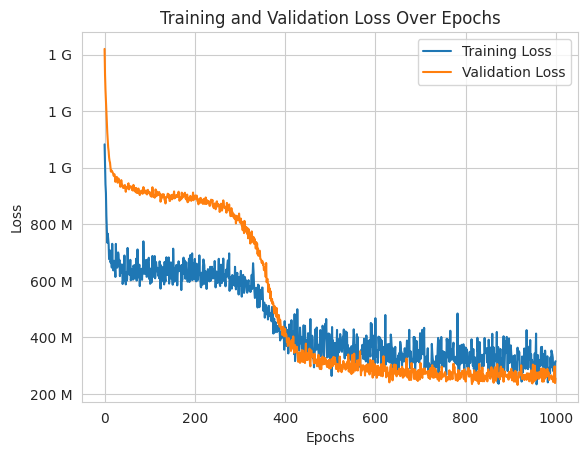

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(history.history['loss'], label='Training Loss') # Creating line plot for training loss.
# Creating line plot for test loss. Note that on the figure it is termed as Validation Loss
# as we plotting the loss for the data provided under validation_data while fitting our ANN.
# However, this is just loss for test data.
sns.lineplot(history.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss Over Epochs') # Setting title for the plot.
fmt = EngFormatter(places=0) # Creating an instance in EngFormatter class with 0 Decimals.
ax.yaxis.set_major_formatter(fmt) # Using EngFormatter for y axis to get the numbers in millions.
ax.set_xlabel('Epochs') # Setting label for x axis.
ax.set_ylabel('Loss') # Setting label for y axis.
plt.legend() # Showing the legend.
plt.show()

### Hyperparameter Tuning Process for ANN Model:

1. Initial Model Configuration:

  **Understanding:**

  I commenced the hyperparameter tuning process with a relatively simple neural network architecture, consisting of 2 hidden layers with 120 neurons (little more than 10 times the number of features) each and an output layer with 1 neuron (as it is a regression task). The neurons for input layer will be decided by the model itself in accordance with the number of features. I have decided on a Relu activation function, and an Adam Optimizer. I also chose a batch size of 32 as this aligns with standard practices in neural network training. This is neither too small for the model to overfit and nor too large that the model cannot calculate the global minimum. I also chose 200 epochs for this initial setup. The number of epochs is arbitrary at this time, I will decide on changing the number of epochs after looking at the training and test loss graph. This initial setup, while straightforward, might not adequately capture the complexity of the underlying data distribution, potentially leading to underfitting.

  **Observations (R Squared Score):**

  * A R Squared score around 50% for the training data and 47% for the test data suggests potential underfitting.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * Both training and test loss keep decreasing with exactly same trajectory, indicating that the model is learning, but there is a noticeable gap between training and test losses, the training loss ends up around 200 Mil but the test loss ends up around 800 Mil, suggesting underfitting. This means the model is not complex enough to capture the underlying patterns in the data.

  * I also observed that the training and test loss is decreasing till 200 epochs. Therefore, I will increase the number of epochs as the first step towards hyperparameter tuning.

  The decision to start with a basic architecture, employing ReLU activation function and Adam optimizer, reflects a sensible approach to model initialization.

2. Increased Number of Epochs:

  **Understanding:**

  Recognizing the potential for underfitting due to the model's inability to capture intricate data patterns, I extended the number of epochs to 1000 to allow the model more opportunities to learn from the data. Please note that this is a huge jump from 200 epochs that we ran our model with before. I have made this big a jump intentionally to amplify the effects of epochs and pinpoint the changes on the graph due to that.

  **Observations (R Squared Score):**

  * The R Squared score of the training set increased to over 75%, while the R Squared score on the test set also increased to 65%.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * The gap between the training loss and testing loss decreased. However, the training and test loss was almost same around 350 epochs but after that training loss keeps decreasing till 1000 epochs but the test loss goes almost flat. Indicating that the model is still learning from on the training data but not able to generalize to the testing data. This indicates overfitting.

  **Corrective Action:**

  Increasing the epochs is a logical strategy to provide the model with sufficient learning iterations. The observed improvement in R Squared scores for both training and test sets indicates that the model benefits from extended training periods. However, we also find a problem of overfitting now. Therefore, my next step will be to introduce regularization through dropout layers.

3. Introduction of First Dropout Layer:

  **Understanding:**

  Acknowledging the gap between training and testing losses (after 350 epochs), suggestive of potential overfitting, I introduced a dropout layer with a 20% dropout rate. This regularization technique aims to prevent over-reliance on specific neurons during training, thereby mitigating overfitting.

  To gain a comprehensive understanding of how dropout layer works, please read the third chapter (Improving the way neural networks learns) in Neural Networks and Deep Learning research paper by Michael Nielsen here: http://neuralnetworksanddeeplearning.com/chap3.html

  **Observations (R Squared Score):**

  * R Squared score for both training and test sets improved to over 81%.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * The gap between the training loss and testing loss disappeared. Now both training and testing loss line on the graph overlaps each other after 400 epochs. Actually, testing loss line goes slightly lower than training loss, indicating effective mitigation of overfitting.

  * Both training and testing losses continued to decrease, although the descent became slower after around 800 epochs.

  * Our model is performing better and now no longer seems to be overfitted or underfitted. I will still go ahead and increase the number of dropout layers and see the difference in model’s performance. Even though a single dropout layer has resolved the issue of overfitting, as this is my first ANN project, I am adding more dropout layers just to see the effects on training and test loss.

  **Corrective Action:**

  Incorporating a dropout layer with a moderate dropout rate is a standard approach to combat overfitting. The subsequent enhancement in R Squared scores and the convergence of training and testing losses confirms that overfitting is being effectively addressed.


4. Introduction of Second Dropout Layer:

  **Understanding:**

  In an effort to further mitigate overfitting, I experimented with adding a second dropout layer.

  **Observations (R Squared Score):**

  * No significant improvement was observed in R Squared score.
  
  **Observations (Training and Validation Loss Over Epochs Graph):**

  * No significant change in loss trajectories compared to when only the first dropout layer was introduced.

  * However, with just one dropout layer the training and test loss went down to 200 million (at the end of 1000 epochs) but with 2nd dropout layer it only went down to 300 million for both training and test sets.

  **Corrective Action:**

  Although the intention to further prevent overfitting was reasonable, the lack of significant improvement suggests that one dropout layer may suffice for this task. This adjustment reflects an understanding that excessive regularization may not necessarily yield better results.

5. Third Dropout Layer:

  **Understanding:**

  Continuing the exploration of regularization techniques, a third dropout layer was introduced just to see the effect.

  **Observations (R Squared Score):**

  * R Squared score for the training set decreased to 76%, and for the test set, it decreased to 73%.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * No significant change was observed in the trajectory of training and test loss compared to when only the first dropout layer was introduced.

  * However, with just one dropout layer the loss went down to 200 million but with 2nd and third dropout layer it only went down to 400 million for both training and test sets.

  * This basically showing that the model is not performing well with more dropout layers and is resulting in underfitting.

  **Corrective Action:**

  The decrease in performance, indicated by lower R Squared scores and slower convergence of losses, suggests that excessive dropout may hinder the model's ability to learn from the data. This step highlights the importance of balancing model complexity and regularization. So we will get back to having only 1 dropout layer.

6. Reverting to One Dropout Layer:

  **Understanding:**

  * Recognizing the diminishing returns with multiple dropout layers, I decided to revert to employing just one dropout layer.

  **Corrective Action:**

  This step signifies that simpler models often generalize better, and unnecessary complexity may hinder performance. Reverting to a simpler architecture ensures a more optimal balance between model complexity and regularization.

7. Increasing Dropout Percentage:

  **Understanding:**

  In an attempt to address potential overfitting, the dropout percentage was increased to 50%. As discussed before, we do not seem to have overfitting issues anymore, this is done only to understand regularization effects on our model.

  **Observations (R Squared Score):**

  * R Squared score for the training set goes down to 67%, and for the test set, it goes down to 65% with increased dropout.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * The loss for both training and testing sets did not start decreasing until 400 epochs, compared to 200 epochs with 20% dropout.

  * The loss for both training and test sets only dropped to around 400 Mil by 1000 epochs, compared to 200 Mil with 20% dropout.

  * This increase in dropout introduces more randomness and noise into the training process, which can slow down the learning process.

  **Corrective Action:**

  The decrease in R Squared scores and slower convergence of losses indicate that this adjustment may be too aggressive, potentially leading to underfitting. This step underscores the delicate balance required between addressing underfitting and avoiding overfitting.

8. Returning to One Dropout Layer with 20% Dropout:

  **Understanding:**

  Ultimately, returning to the previous dropout configuration was deemed necessary to maintain an appropriate balance between model complexity and regularization.

  **Corrective Action:**

  This decision was a learning towards hyperparameter tuning, ensuring that the model neither underfits nor overfits the data. By striking the right balance, the model is fit to achieve optimal performance for the given task.

9. Increasing or Decreasing Number of Neurons: (a range between 50 to 250 neurons)

  **Understanding:**

  To further optimize the model's architecture, I experimented with varying the number of neurons in the hidden layers, aiming to find the optimal balance between model complexity and generalization. Increasing the number of neurons in the hidden layers can increase the model's capacity to learn complex patterns from the data and might result in a better R Squared score. Decreasing the number of neurons on other hand can reduce the model's capacity and complexity, which may help mitigate overfitting. A simpler model is less likely to memorize noise in the training data and may generalize better to unseen data. Given our observations of underfitting and overfitting during hyperparameter tuning, adjusting the number of neurons in the hidden layers could be a valuable experiment to find the optimal model complexity for our dataset.

  **Observations on Increasing Neurons:**

  **Observations (On R Squared score):**

  * The R Squared score increased on the training set but decreased on the test set, indicating potential overfitting.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * There was a steep decrease in both losses after 180 epochs, steeper than when using 120 neurons.

  * The training and test losses decreased to 200 Mil at the end of 1000 epochs.

  * Indication of overfitting as the R Squared score on training set is much higher than on test set. Also, the test loss seems to increase a little bit around the end.

  **Observations on Decreasing Neurons:**

  **Observations (On R Squared score):**

  * The R Squared score decreased on both training and test sets, suggesting underfitting.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * There is a gap between training and test loss has increased again.
  
  * This indicates that reducing model complexity may help mitigate overfitting but may lead to underfitting.

  **Corrective Action:**

  This step was again a learning towards overfitting and underfitting when we increase or decrease the complexity of the model through adjusting the number of neurons.


10. Returning to 120 neurons: This was deemed optimal based on experimentation. This decision reflects a balanced approach to model complexity, ensuring effective learning without overfitting or underfitting.

11. Using Sigmoid Activation Function (Instead of Relu):

  **Understanding:**

  We have discussed the benefits of Relu over Sigmoid. However, I still wanted to experiment with activation functions, so I opted to use Sigmoid instead of ReLU to observe its effect on model performance.

  **Observations (On R Squared score):**

  * R Squared scores on both training and test sets were very poor (8% and 5%, respectively), indicating severe underfitting.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * There is a wide gap between training and test loss lines, further confirms underfitting.

  **Corrective Action:**

  Returning to ReLU activation function is advisable as it generally performs better in deep neural networks, mitigating the risk of vanishing gradients and promoting sparsity.

12. Introducing Regularization:

  **Understanding:**

  Despite not exhibiting overfitting behaviour, I experimented with L1 and L2 regularization to observe their effects on model performance.

  To gain a comprehensive understanding of how regularization works, please read the third chapter (Improving the way neural networks learns) in Neural Networks and Deep Learning research paper by Michael Nielsen here: http://neuralnetworksanddeeplearning.com/chap3.html

  **Observations with L1 Regularization:**

  * R Squared score of the test data decreased, while the R Squared score of the training data increased, indicating overfitting.

  **Observations with L2 Regularization:**

  * Similar to L1 regularization, the R Squared score of the test data decreased, while the R Squared score of the training data increased, indicating overfitting.

  **Corrective Action:**

  Given the negative impact on performance observed with regularization, it was deemed unnecessary and subsequently removed.

13. Increasing Learning Rate: (range between 0.001 to 1)

  **Understanding:**

  To expedite the optimization process during training, I experimented with increasing the learning rate.

  **Observations (On R Squared score):**

  * The R Squared score was much higher on the training set compared to the test set, indicating overfitting.

  **Observations (Training and Validation Loss Over Epochs Graph):**

  * The loss dropped sharply within 200 epochs, but then the test loss increased while the training loss continued to drop, indicating overfitting.

  **Corrective Action:**

  Reverting to the default learning rate is advisable to prevent overfitting and maintain a balanced optimization process.

14. **Incorporating a hybrid model of Artificial Neural Network (ANN) with a Long Short-Term Memory (LSTM):** Considering revenue data of Amazon UK Grocery should exhibits temporal dependencies, I have experimented incorporating LSTM layer/s into our ANN model. LSTM layers are adept at capturing temporal dependencies, such as seasonality, trends, and periodic patterns, making them well-suited for sequential data like revenue. The LSTM's forget gate, input gate, and output gate selectively process information over time, retaining relevant past information while incorporating new insights from the current input. By integrating LSTM layers into our ANN model, we might be able to leverage their ability to learn and model long-term dependencies, ultimately enhancing our revenue prediction accuracy.

  **Observations**

  However, this resulted in a significant overfitting issue, where the R Squared score for the training set surpasses 91%, but on the test set, it is only slightly over 72%.

15. **Experimenting with lower and higher epochs:**  I have found that 1000 epochs is the best number for this model. With lower epochs the loss for both training and test set keeps decreasing (at lower rate) till the end of epochs and with higher epochs we see that the training and test loss goes almost flat after 1000 epochs.

16. **Experimenting with different loss functions:** Even though MSE is the most commonly used loss function for regression problems, I have also experimented with MAE as loss function considering the presence of outliers in our data as shown above (Distributions). MSE’s operation of squaring the errors penalizes larger errors more heavily than smaller ones making it sensitive to outliers since the squared differences amplify their effect on the loss. MAE on the other hand treats all errors equally regardless of their magnitude. It doesn't penalize outliers as heavily as MSE. Therefore, I wanted to see the model’s performance with MAE. However, I got a low R Squared score of 65% on test set, with MAE as loss function.

17. **Experimenting with random train/test split:** As discussed in the project's introduction, we have moved away from the conventional train/test split to emulate real-world scenarios. Nevertheless, to gauge the model's efficiency in such circumstances, I employed a train/test split from scikit-learn. Unfortunately, the model exhibited subpar performance, achieving only a 67% R Squared score on the test set.

18. **Experimenting with correlated features:** I have also experimented with taking out both FBA fee and Weight. It results in low R Squared score on both training and test set. I have tired taking them of one at a time and the best results are with only Weight. Therefore, I have taken out FBA fee.

19. **Experimenting with Category column:**  I attempted to encode the Category column (using One Hot Encoding) to use it as a feature in our ANN. However, this led to overfitting with very high R Squared score in training set and a low score in test set.

20. **Experimenting with different scaling methods:** As discussed above, we have selected Robust Scaler instead of MinMax or StandardScaler due to the outliers in the data. However, as this is my first ANN project, I have gone ahead and changed the scaling method. But with both MinMaxScaler and StandardScaler I get a very low R Squared score.

21. I have also experimented with lower and higher batch size than 32 but it results in overfitting and underfitting respectively.

22. I have also tried a model with more than 2 dense layers, but it results in overfitting.



## Summary

In the attempt to construct my first Artificial Neural Network (ANN), the process of selecting an architecture and embarking on hyperparameter tuning initially felt somewhat arbitrary. However, by closely monitoring R Squared scores and employing graphical representations to visualize the training and test losses, I gained invaluable insights into the model's behaviour. Without these visual aids, understanding the nuanced effects of hyperparameter tuning on the model's performance would have been significantly challenging.

Through iterative adjustments of various parameters as well as network's architecture, and vigilant observation of their impacts on model performance, I successfully navigated the delicate balance between underfitting and overfitting. This meticulous approach ultimately led to the identification of a well-optimized model configuration.

It's essential to acknowledge that while our linked project utilizing a Random Forest model achieved superior performance (with an R-squared score exceeding 92% on the same dataset) compared to this ANN (with an R-squared score just over 81.05%), I remain convinced that this ANN model represents the best optimization for this dataset. The disparity in R-squared scores between the ANN and Random Forest models can be attributed to differences in their operational mechanisms and the dataset's size. With a larger dataset for training, I am confident that the ANN's performance would parallel, if not surpass, that of the Random Forest model.

Furthermore, it's crucial to acknowledge that we obtained a MAE score of just over £3009 in our Random Forest implementation compared to a MAE score just over £5684 in our ANN. As we evaluate our error in real currency value with MAE, comparing these scores to the mean of our Revenue column would be logical. Considering the mean of the revenue column is just over £11330, these MAE for both our models seems very high. However, it's important to note that the mean of the revenue column is influenced by outliers and that we have a skewed distribution of our Revenue column (as depicted in the distribution). Taking this into account, I am confident that even though these MAE errors seem high compared to the mean of the Revenue column, the models are still predicting with relatively good accuracy.

Moreover, as a seasoned professional in sales forecasting, I understand firsthand the importance of accuracy in revenue predictions. Sales forecasting typically involves categorizing deals into worst case, forecast, and best-case scenarios based on their probability of closing within a given timeframe. Deals categorized as worst case having over 90% probability, forecast deals over 70%, and best-case deals over 50%, we can position the ANN's R Squared score of 81% within this framework. Deals which fall within the forecast category, indicates a high likelihood of success. With an R-squared score exceeding 81%, our ANN's predictions can be considered to fall within this forecast range, providing decision-makers with actionable insights for strategy formulation. This level of accuracy is paramount in aiding decision-making processes, enabling businesses to allocate resources effectively, optimize inventory management, and streamline sales strategies to maximize revenue potential.

In summary, the ANN's performance, with an R Squared score exceeding 81%, is highly practical and beneficial for decision-makers in sales and revenue management.

## Bibliography

[1] Glorot, X., Bordes, A., & Bengio, Y. (2011). Deep sparse rectifier neural networks. In Proceedings of the Fourteenth International Conference on Artificial Intelligence and Statistics (pp. 315-323): https://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf

[2] Li, K(Y). (2023). Vanishing and Exploding Gradients in Neural Network Models: Debugging, Monitoring, and Fixing: https://neptune.ai/blog/vanishing-and-exploding-gradients-debugging-monitoring-fixing#:~:text=Use%20ReLU%20as%20the%20activation%20function&text=As%20shown%20in%20this%20graph,won't%20be%20vanishing%20gradients.

[3] Kingma, D. P., & Ba, J. (2015). Adam: A method for stochastic optimization.arXiv:1412.6980: https://arxiv.org/pdf/1412.6980

[4] Jadon, A., Patil, A., Jadon S. (2022). A Comprehensive Survey of Regression Based Loss Functions for Time Series Forecasting. arXiv:2211.02989: https://arxiv.org/pdf/2211.02989